# Titanic survived Project

### Project prepaired by VISHAL

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
data = pd.read_csv(url)

In [3]:
# Preview the first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing values
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

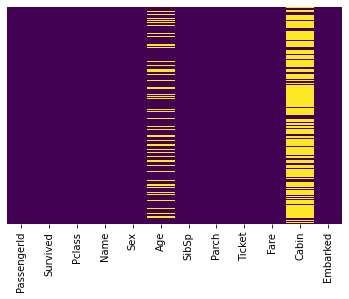

In [5]:
# Visualize missing values using heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [6]:
# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
# Fill missing values in 'Age' column
data['Age'] = data['Age'].fillna(data['Age'].median())

In [8]:
# Fill missing values in 'Embarked' column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [9]:
# One-hot encode the 'Sex' column
data = pd.get_dummies(data, columns=['Sex'])


In [10]:
# One-hot encode the 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'])

In [11]:
# Separate the target variable and features
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [12]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [15]:
# Instantiate the model
model = LogisticRegression()

In [16]:
# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
# Predict the target variable for the testing data
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Accuracy score: 0.8044692737430168
Confusion matrix: [[90 15]
 [20 54]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

